#RESTAURANT SALES REPORT

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("Restaurant Sales Report.xlsx")
print(df)

     order_id       date        item_name  item_type  item_price  quantity  \
0           1 2022-03-07         Aalopuri   Fastfood          20        13   
1           2 2022-08-23          Vadapav   Fastfood          20        15   
2           3 2022-11-20          Vadapav   Fastfood          20         1   
3           4 2023-03-02  Sugarcane juice  Beverages          25         6   
4           5 2022-02-10  Sugarcane juice  Beverages          25         8   
..        ...        ...              ...        ...         ...       ...   
995       996 2023-03-19          Frankie   Fastfood          50        10   
996       997 2022-09-20         Sandwich   Fastfood          60         7   
997       998 2023-01-26         Sandwich   Fastfood          60        13   
998       999 2022-08-27         Panipuri   Fastfood          20         5   
999      1000 2022-05-29         Aalopuri   Fastfood          20         3   

     transaction_amount transaction_type received_by time_of_sa

In [4]:
df.shape

(1000, 10)

In [5]:
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

#For better convinence we replace Mr. by Male and Mrs. by Female.

In [6]:
df["received_by"]=df["received_by"].replace({"Mr.":"Male","Mrs.":"Female"})

In [11]:
#print(df)

#Replace NaN values in the transaction_type column by most frequent value in the column.

In [7]:
df["transaction_type"]=df["transaction_type"].fillna(df["transaction_type"].mode()[0])
#print(df)

In [8]:
df.isnull()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [10]:
df.describe()

,order_id,date,item_price,quantity,transaction_amount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
mean,500.500000,2022-10-02 05:15:21.600000,33.315000,8.162000,275.230000
min,1.000000,2022-01-04 00:00:00,20.000000,1.000000,20.000000
25%,250.750000,2022-06-17 00:00:00,20.000000,4.000000,120.000000
50%,500.500000,2022-09-21 00:00:00,25.000000,8.000000,240.000000
75%,750.250000,2023-01-02 00:00:00,50.000000,12.000000,360.000000
max,1000.000000,2023-12-03 00:00:00,60.000000,15.000000,900.000000
std,288.819436,NaN,14.921744,4.413075,204.402979


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [12]:
print(df)

     order_id       date        item_name  item_type  item_price  quantity  \
0           1 2022-03-07         Aalopuri   Fastfood          20        13   
1           2 2022-08-23          Vadapav   Fastfood          20        15   
2           3 2022-11-20          Vadapav   Fastfood          20         1   
3           4 2023-03-02  Sugarcane juice  Beverages          25         6   
4           5 2022-02-10  Sugarcane juice  Beverages          25         8   
..        ...        ...              ...        ...         ...       ...   
995       996 2023-03-19          Frankie   Fastfood          50        10   
996       997 2022-09-20         Sandwich   Fastfood          60         7   
997       998 2023-01-26         Sandwich   Fastfood          60        13   
998       999 2022-08-27         Panipuri   Fastfood          20         5   
999      1000 2022-05-29         Aalopuri   Fastfood          20         3   

     transaction_amount transaction_type received_by time_of_sa

In [13]:
df["date"]=pd.to_datetime(df["date"])

In [14]:
df['Year']=df['date'].dt.year
#print(df)

In [15]:
df['Months']=df['date'].dt.month
#print(df)

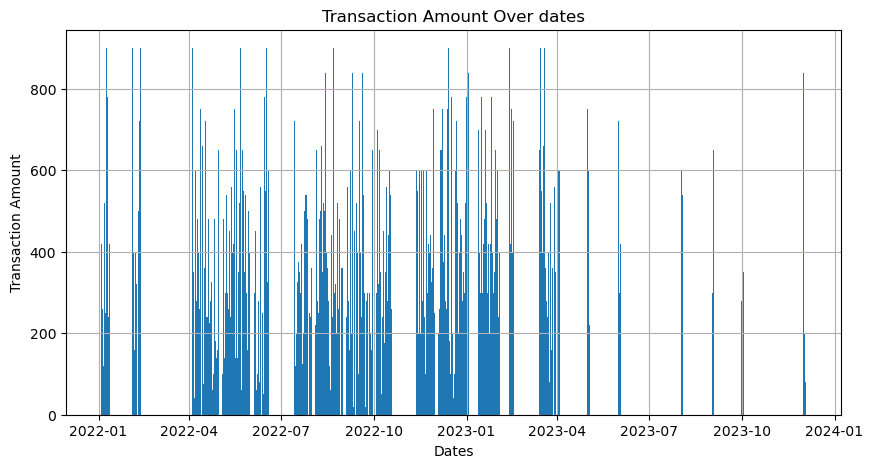

In [16]:
plt.figure(figsize=(10,5))
plt.bar(df['date'],df['transaction_amount'])
plt.xlabel("Dates")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Over dates")
#plt.legend()
plt.grid()
plt.show()

# customers is maximum in 2022

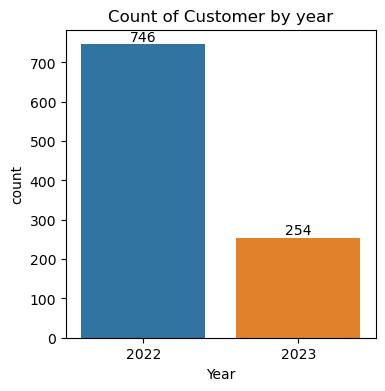

In [18]:
plt.figure(figsize=(4,4))
t=sns.countplot(x="Year",data=df)
t.bar_label(t.containers[0])
plt.title("Count of Customer by year")
plt.show()

#transaction_amount is high in 2022

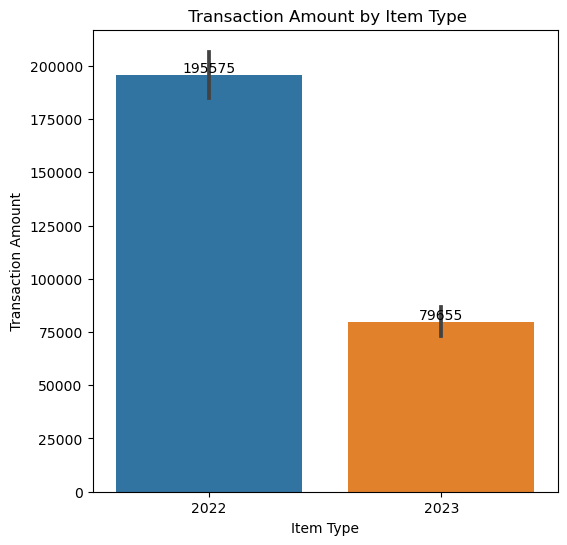

In [19]:
plt.figure(figsize=(6,6))
t=sns.barplot(x="Year",y="transaction_amount",data=df,estimator=sum)
t.bar_label(t.containers[0])
plt.xlabel("Item Type")
plt.ylabel(" Transaction Amount ")
plt.title(" Transaction Amount by Item Type")
plt.show()

#customers high in fifth  and eighth month

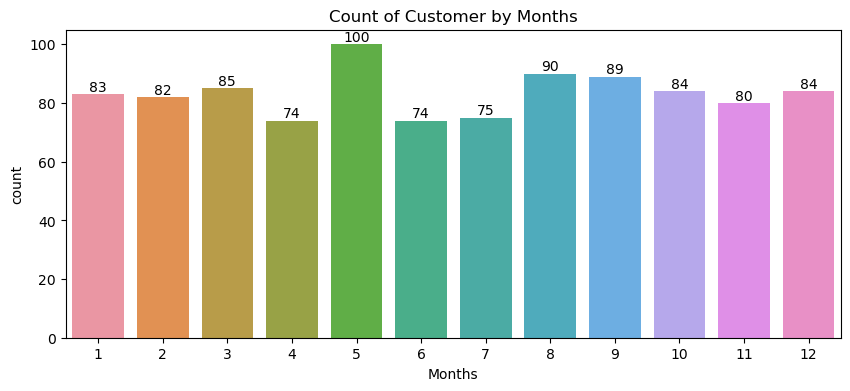

In [52]:
plt.figure(figsize=(10,4))
t=sns.countplot(x="Months",data=df)
t.bar_label(t.containers[0])
plt.title("Count of Customer by Months")
plt.show()

#In Restaurant customers was high in August 2022 and low in january 2022 .also,customers was high in january and march 2023 and  low in december 2023.

In [23]:
df["Year"]=df["Year"].astype(str)
df["Months"]=df["Months"].astype(str)

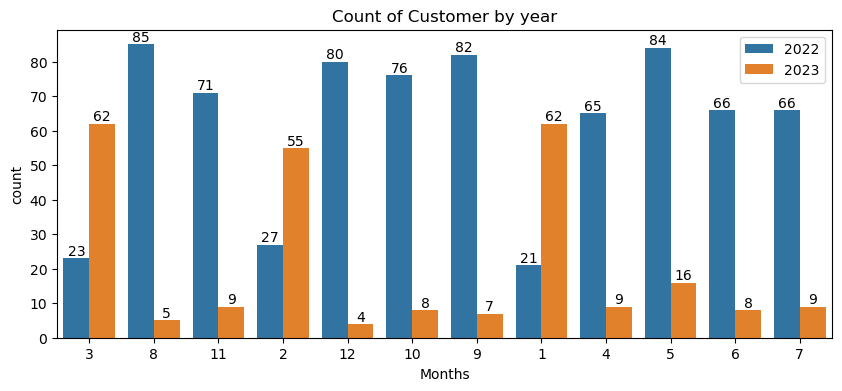

In [24]:

plt.figure(figsize=(10,4))
t=sns.countplot(x="Months",data=df,hue="Year")
t.bar_label(t.containers[0])
t.bar_label(t.containers[1])
plt.title("Count of Customer by year")
plt.legend()
plt.show()

#sales are high in fifth and second months

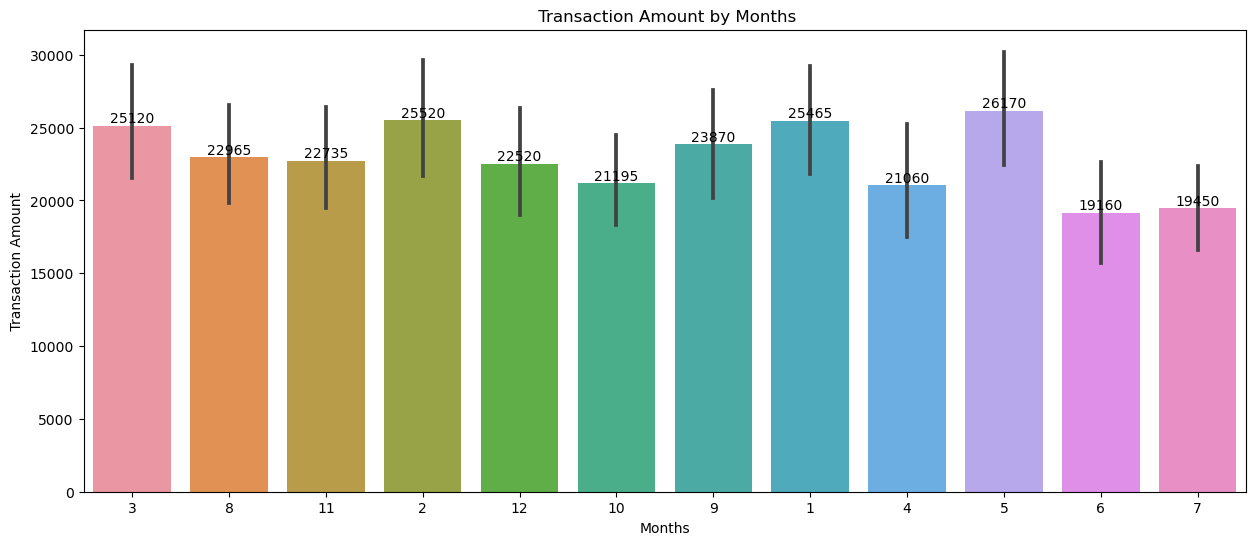

In [25]:
plt.figure(figsize=(15,6))
t=sns.barplot(x="Months",y="transaction_amount",data=df,estimator=sum)
t.bar_label(t.containers[0])
plt.xlabel("Months")
plt.ylabel(" Transaction Amount ")
plt.title(" Transaction Amount by Months")
plt.show()

#count of beverages is high as compared to fast food

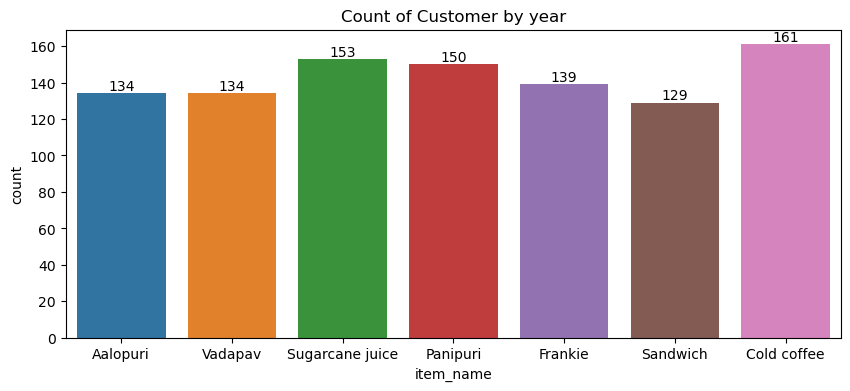

In [27]:
plt.figure(figsize=(10,4))
t=sns.countplot(x="item_name",data=df)
t.bar_label(t.containers[0])
plt.title("Count of Customer by year")
plt.show()

#sandwich sales is high as compared to others

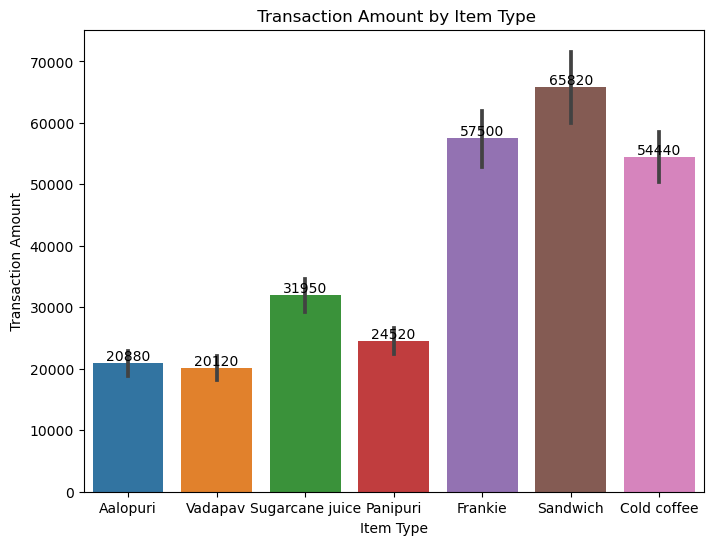

In [28]:
plt.figure(figsize=(8,6))
t=sns.barplot(x="item_name",y="transaction_amount",data=df,estimator=sum)
t.bar_label(t.containers[0])
plt.xlabel("Item Type")
plt.ylabel(" Transaction Amount ")
plt.title(" Transaction Amount by Item Type")
plt.show()

#Fast Food count is higher than Beverages

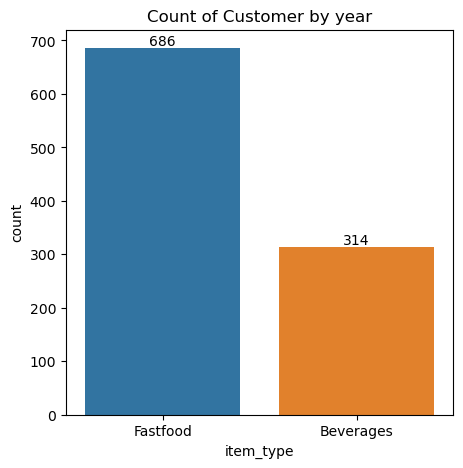

In [30]:
plt.figure(figsize=(5,5))
t=sns.countplot(x="item_type",data=df)
t.bar_label(t.containers[0])
plt.title("Count of Customer by year")
plt.show()

#Fast Food sales is Higher than Beverages

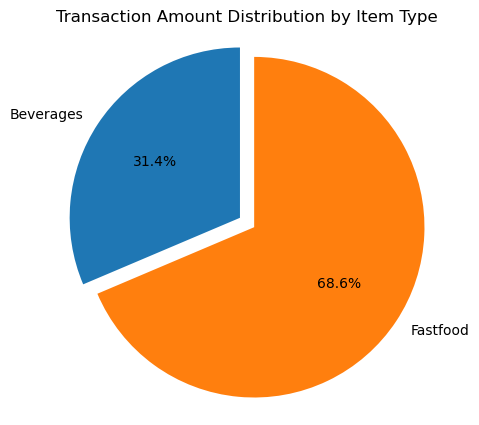

In [31]:
item_grouped=df.groupby('item_type')['transaction_amount'].sum()
plt.figure(figsize=(5,5))
explode=(0.1,0)
#c=['#ff9999','#66b3ff']
#c=['#99ff99','#ffcc99']
plt.pie(item_grouped,labels=item_grouped.index,autopct='%1.1f%%',startangle=90,explode=explode)
plt.title('Transaction Amount Distribution by Item Type')
plt.axis('equal')
plt.show()

#Both Item_price and Quantity Increases then amount is also increases(directly proportional)

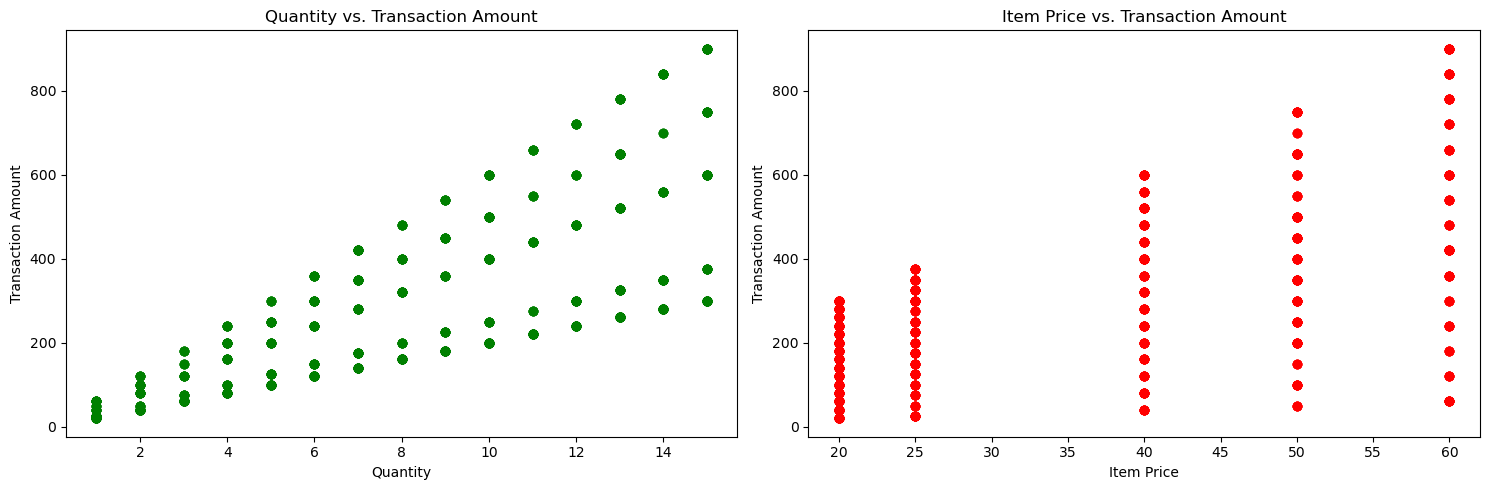

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot quantity vs. transaction_amount
axs[0].scatter(df['quantity'], df['transaction_amount'], color='green')
axs[0].set_title('Quantity vs. Transaction Amount')
axs[0].set_xlabel('Quantity')
axs[0].set_ylabel('Transaction Amount')

# Plot item_price vs. transaction_amount
axs[1].scatter(df['item_price'], df['transaction_amount'], color='red')
axs[1].set_title('Item Price vs. Transaction Amount')
axs[1].set_xlabel('Item Price')
axs[1].set_ylabel('Transaction Amount')

# Adjust layout
plt.tight_layout()
plt.show()

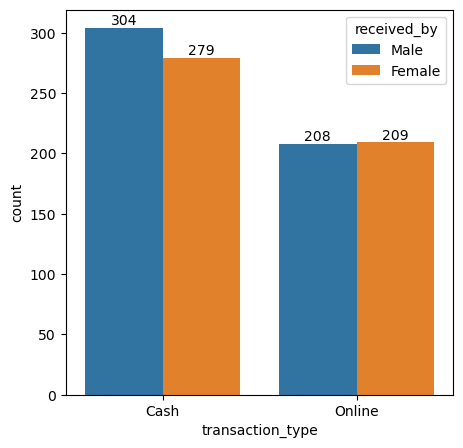

In [75]:
plt.figure(figsize=(5,5))
t=sns.countplot(x="transaction_type",data=df,hue="received_by")
t.bar_label(t.containers[0])
t.bar_label(t.containers[1])
#plt.title("Count of Customer by transaction type")
plt.show()

#Most of the customers prefers cash Payments as compared to online

In [59]:
#df.info()

In [69]:
df['Year']=df['Year'].astype(str)

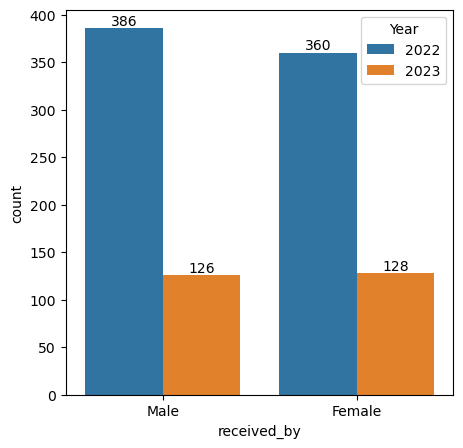

In [76]:
plt.figure(figsize=(5,5))
t=sns.countplot(x="received_by",data=df,hue="Year")
t.bar_label(t.containers[0])
t.bar_label(t.containers[1])
plt.show()

#Male Gender of the person handling the maximum transaction.

C:\Users\jadha\AppData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jadha\AppData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


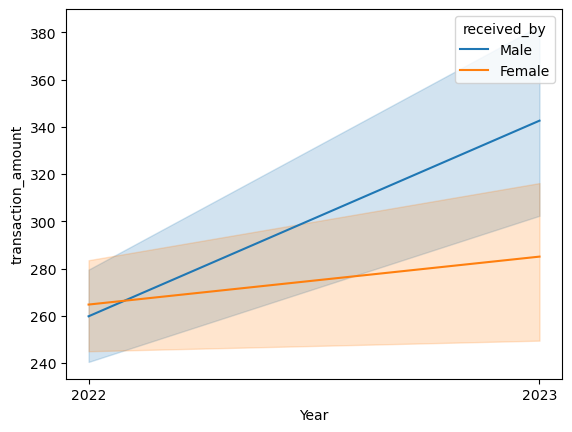

In [77]:
sns.lineplot(x="Year",y="transaction_amount",hue="received_by",data=df)
plt.title=("Year-wise Amount per Gender")
plt.show()

In [84]:
#df.info()

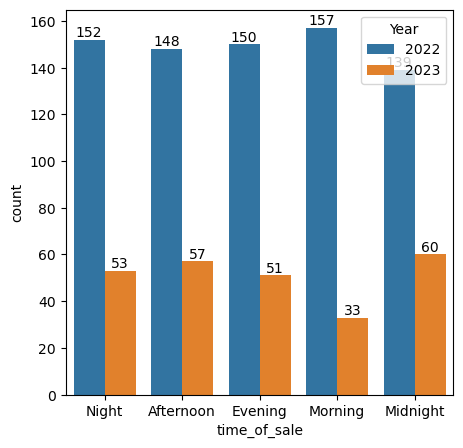

In [78]:
plt.figure(figsize=(5,5))
t=sns.countplot(x="time_of_sale",data=df,hue="Year")
t.bar_label(t.containers[0])
t.bar_label(t.containers[1])
#plt.title("Count of Customer by time of sale")
plt.show()

#Maximum Sales occurred in afternoon and night

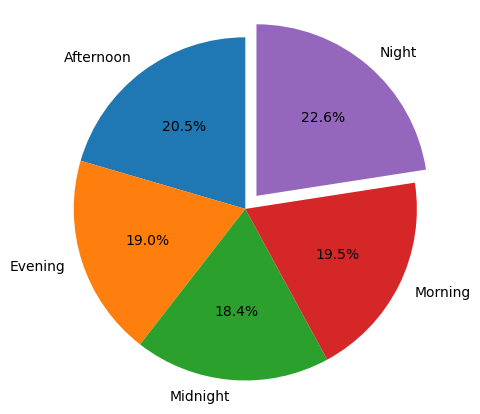

In [83]:
item_grouped=df.groupby('time_of_sale')['transaction_amount'].sum()
plt.figure(figsize=(5,5))
explode=(0,0,0,0,0.1)
#c=['#ff9999','#66b3ff','#99ff99','#ffcc99',"orange"]
#c=['#99ff99','#ffcc99']
plt.pie(item_grouped,labels=item_grouped.index,autopct='%1.1f%%',startangle=90,explode=explode)#colors=c
#plt.title('Transaction Amount Distribution by Time of Sale')
plt.axis('equal')
plt.show()

#Conclusion:

.Maximum Sales occurred in 2022
.count of beverages is high as compared to fast food but amount is less than fast food
.Overall Fast Food sales,amount is Higher than Beverages
.Most of the customers prefers cash payments as compared to online
.Male Gender person handling the maximum transaction.
.Maximum Sales occurred in afternoon and night

#Recommendations:

1.Expand Beverage Options:
Introduce higher-margin drinks and offer combo deals with fast food to increase beverage revenue.

2.Focus on Top Fast Food Items:
Promote the best-selling fast food options and encourage cross-selling with add-ons or beverages.

3.Leverage Peak Hours:
Run promotions in the afternoon and night to boos sales further,and adjust staffing to handle peak demand efficiently.

4.Enhance Payment Options:
Since most customers prefer cash ,consider offering incentives for online payments to balance transaction methods.

#####Thank you#####